In [4]:
!pip install geopy



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [8]:
import sys
print(sys.executable)


c:\Users\Admin\AppData\Local\Programs\Python\Python311\python.exe


In [9]:
import json
import os
from geopy.distance import geodesic


# Set your folder path
folder_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Data"

# Create empty list to store each feature
features = []

def compute_length(coords):
    total = 0
    for i in range(len(coords) - 1):
        total += geodesic(coords[i][::-1], coords[i+1][::-1]).meters  # reverse (lon, lat) to (lat, lon)
    return total

# Iterate over each GeoJSON file
for filename in os.listdir(folder_path):
    if filename.endswith('.json') or filename.endswith('.geojson'):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)
            feature = {
                "type": "Feature",
                "properties": {
                    "name": filename.replace('.json', '').replace('.geojson', ''),
                    "length_m": compute_length(data["geometry"]["coordinates"])
                },
                "geometry": data["geometry"]
            }
            features.append(feature)

# Create final FeatureCollection
combined_geojson = {
    "type": "FeatureCollection",
    "features": features
}

# Save to file
output_file = os.path.join(folder_path, "combined_usiu_paths.geojson")
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(combined_geojson, f, indent=2)

print("✅ Combined GeoJSON saved to:", output_file)


✅ Combined GeoJSON saved to: C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Data\combined_usiu_paths.geojson


In [1]:
import geopandas as gpd

# File path
geojson_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Data\combined_usiu_paths.geojson"

# Read file
gdf = gpd.read_file(geojson_path)

# Show basic info
print(gdf.head())


                              name    length_m  \
0  cafe lata Parking plot luandary  327.515858   
1    d and c to admin stining area   63.264897   
2               D and c to E and F   26.033880   
3               E and F to K and l   30.298816   
4                 E and F to Lab z   39.606371   

                                            geometry  
0  LINESTRING (36.87749 -1.21769, 36.87761 -1.217...  
1  LINESTRING (36.8796 -1.21856, 36.8796 -1.21854...  
2   LINESTRING (36.8797 -1.21845, 36.87975 -1.21822)  
3  LINESTRING (36.87975 -1.21823, 36.87979 -1.218...  
4  LINESTRING (36.87975 -1.21823, 36.87976 -1.218...  


In [8]:
# Extract start and end points from LineString geometry
gdf['start'] = gdf.geometry.apply(lambda x: x.coords[0])
gdf['end'] = gdf.geometry.apply(lambda x: x.coords[-1])

# Preview result
print(gdf[['start', 'end']].head())

                  start                   end
0  (36.87749, -1.21769)  (36.87937, -1.21973)
1   (36.8796, -1.21856)  (36.87928, -1.21878)
2   (36.8797, -1.21845)  (36.87975, -1.21822)
3  (36.87975, -1.21823)  (36.87979, -1.21796)
4  (36.87975, -1.21823)  (36.87954, -1.21832)


<Axes: >

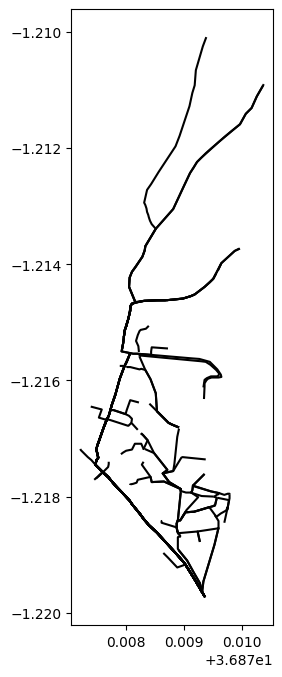

In [9]:
gdf.plot(figsize=(10, 8), edgecolor='black')


In [11]:
# Create a directed graph (change to nx.Graph() for undirected)
G = nx.DiGraph()

# Loop through each path and add as edge with optional attributes
for idx, row in gdf.iterrows():
    start = row['start']
    end = row['end']
    length = row['geometry'].length  # optionally store length
    G.add_edge(start, end, length=length)

# ✅ Check basic graph info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# ✅ Optional: preview some edges
for u, v, data in list(G.edges(data=True))[:5]:
    print(f"{u} -> {v}, length: {data['length']:.2f}")

Number of nodes: 98
Number of edges: 78
(36.87749, -1.21769) -> (36.87937, -1.21973), length: 0.00
(36.8796, -1.21856) -> (36.87928, -1.21878), length: 0.00
(36.8797, -1.21845) -> (36.87975, -1.21822), length: 0.00
(36.87975, -1.21823) -> (36.87979, -1.21796), length: 0.00
(36.87975, -1.21823) -> (36.87954, -1.21832), length: 0.00


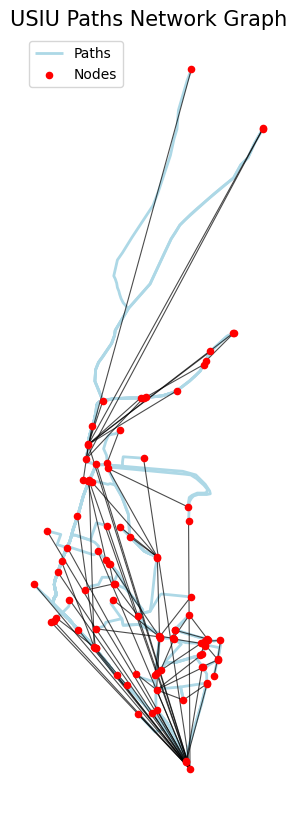

In [12]:
import matplotlib.pyplot as plt

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot original paths from GeoDataFrame
gdf.plot(ax=ax, color='lightblue', linewidth=2, label="Paths")

# Plot graph edges (same as paths)
for u, v in G.edges():
    x_vals = [u[0], v[0]]
    y_vals = [u[1], v[1]]
    ax.plot(x_vals, y_vals, color='black', linewidth=0.8, alpha=0.7)

# Plot graph nodes
x_nodes = [node[0] for node in G.nodes()]
y_nodes = [node[1] for node in G.nodes()]
ax.scatter(x_nodes, y_nodes, color='red', s=20, zorder=5, label="Nodes")

# Decorations
ax.set_title("USIU Paths Network Graph", fontsize=15)
ax.legend()
ax.axis("off")

plt.show()
